# DYNAMIC PRICE OPTIMIZATION FOR E-COMMERCE

# Importing required libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Importing the dataset

In [4]:
data = pd.read_csv('/content/ecommercedata.csv')

In [5]:
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [6]:
data.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

# Data Preprocessing

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Handle missing values
data.fillna(0, inplace=True)  # Replace NaN with 0, adapt based on your dataset

# Split data into features and target variable
X = data[['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Weight_in_gms']]
y = data['Discount_offered']

# Visulizing the data

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Heatmap

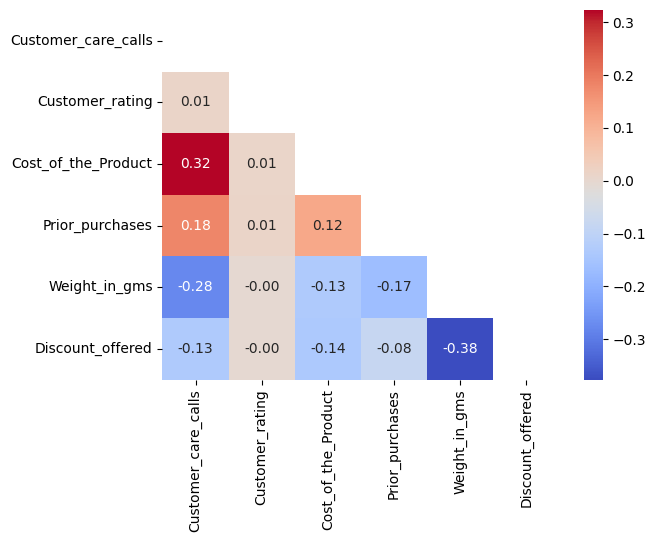

In [9]:
# Calculate correlation matrix with numeric_only set to True
corr_data = data[['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Weight_in_gms', 'Discount_offered']]
correlation_matrix = corr_data.corr(numeric_only=True)
matrix = np.triu(correlation_matrix)

# Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=matrix)
plt.show()

# Histograms

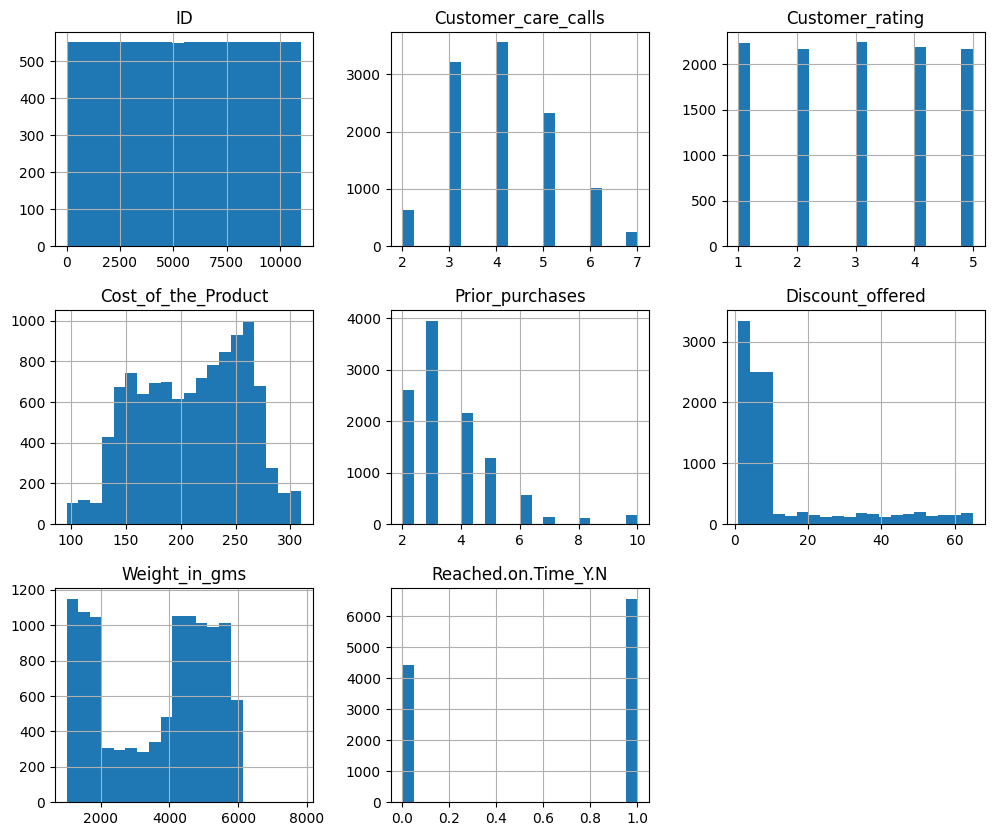

In [17]:
# Histograms
data.hist(figsize=(12, 10), bins=20)
plt.show()

# Boxplot

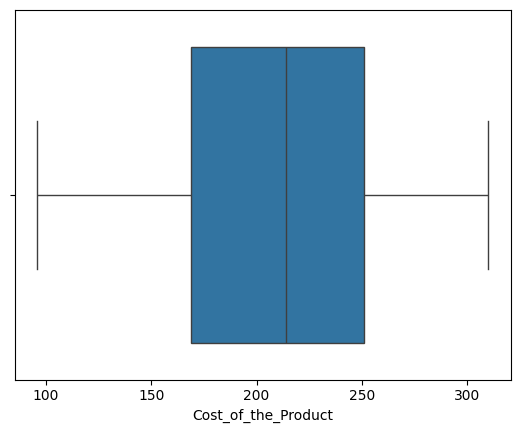

In [ ]:
# Boxplot for 'Cost_of_the_Product'
sns.boxplot(x='Cost_of_the_Product', data=data)
plt.show()

# Countplot

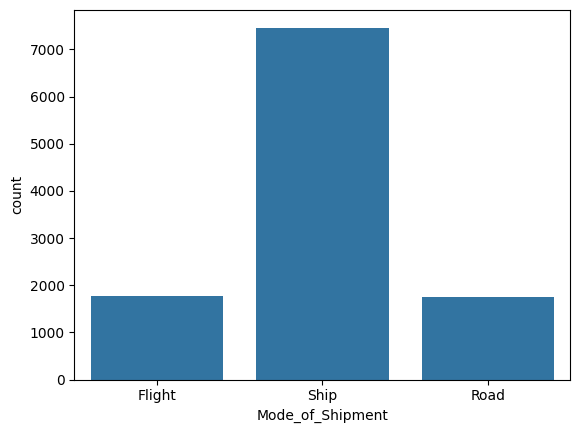

In [ ]:
# Countplot for 'Mode_of_Shipment'
sns.countplot(x='Mode_of_Shipment', data=data)
plt.show()

# Splitting the data into training and testing sets

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature scaling

In [ ]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Hyperparameter Tuning with Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2]
}

svr = SVR()
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_scaled)


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 0.2],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='neg_mean_squared_error')

# Plot for Grid Search

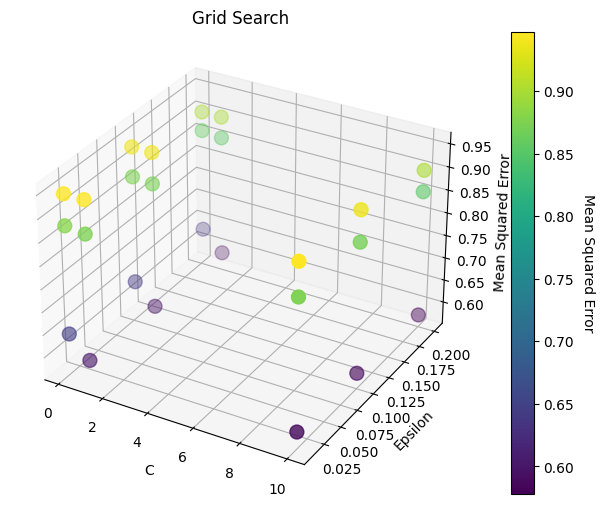

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV

# Assuming 'grid_search' is your GridSearchCV object

# Extract relevant information from the grid search results
params = grid_search.cv_results_['params']
mean_scores = -grid_search.cv_results_['mean_test_score']

# Create a scatter plot for each combination of hyperparameters
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Extract values of hyperparameters
C_values = [param['C'] for param in params]
epsilon_values = [param['epsilon'] for param in params]
kernel_values = [param['kernel'] for param in params]

# Plotting
sc = ax.scatter(C_values, epsilon_values, mean_scores, c=mean_scores, cmap='viridis', s=100)
ax.set_xlabel('C')
ax.set_ylabel('Epsilon')
ax.set_zlabel('Mean Squared Error')
ax.set_title('Grid Search')

# Adding colorbar
cbar = fig.colorbar(sc)
cbar.set_label('Mean Squared Error', rotation=270, labelpad=15)

plt.show()


In [ ]:
# Best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')


Best Hyperparameters: {'C': 10, 'epsilon': 0.2, 'kernel': 'rbf'}


# Model Training Using SVR

In [ ]:
svr_model = SVR(kernel='linear', C=1.0)
svr_model.fit(X_train_scaled, y_train_scaled)

SVR(kernel='linear')

# Model Evaluation

In [ ]:
X_test_scaled = scaler_X.transform(X_test)
y_test_pred_scaled = svr_model.predict(X_test_scaled)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()

In [ ]:
mse = mean_squared_error(y_test, y_test_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 239.54933444467204


# Line plot for actual vs. predicted values

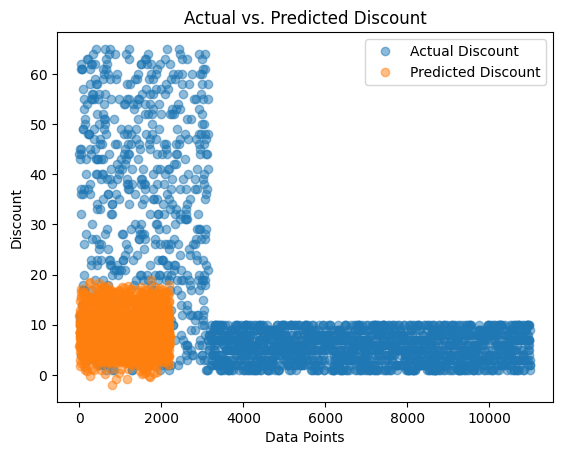

In [ ]:
plt.plot(y_test, label='Actual Discount', marker='o', linestyle='', alpha=0.5)
plt.plot(y_test_pred, label='Predicted Discount', marker='o', linestyle='', alpha=0.5)
plt.xlabel('Data Points')
plt.ylabel('Discount')
plt.title('Actual vs. Predicted Discount')
plt.legend()
plt.show()

# Actual vs Predicted values

In [ ]:
max_percentage = 100
indices = np.argsort(y_test)
y_test_percentage = y_test.iloc[indices] / max_percentage
y_test_pred_percentage = y_test_pred[indices] / max_percentage
np.set_printoptions(formatter={'float': '{:.2%}'.format})

print("Actual Percentages:")
print(y_test_percentage.values)
print("\nPredicted Percentages:")
print(y_test_pred_percentage)


Actual Percentages:
[1.00% 1.00% 1.00% ... 65.00% 65.00% 65.00%]

Predicted Percentages:
[4.48% 8.74% 9.53% ... 15.23% 16.15% 7.40%]


In [ ]:
# Calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# Calculate MAPE for the selected data points
mape = calculate_mape(y_test_percentage.values, y_test_pred_percentage)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Calculate accuracy as the percentage of correct predictions
accuracy = 100 - np.mean(np.abs(y_test_percentage.values - y_test_pred_percentage) * 100)
print(f"Accuracy: {accuracy:.2f}%")

Mean Absolute Percentage Error (MAPE): 110.18%
Accuracy: 91.12%


# Accuracy

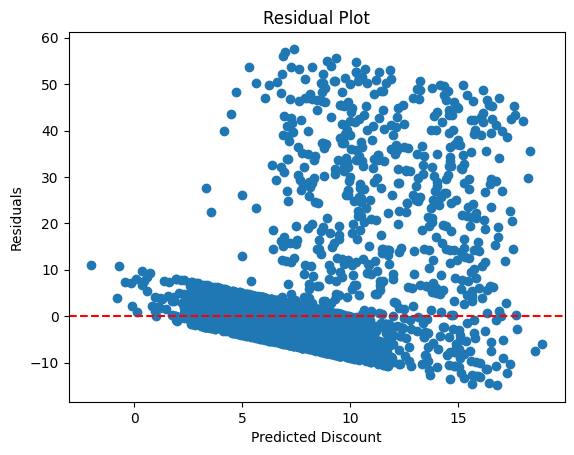

In [ ]:
# Residual plot to check for homoscedasticity
residuals = y_test - y_test_pred
plt.scatter(y_test_pred, residuals)
plt.xlabel('Predicted Discount')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

In [ ]:
# Price Optimization
# Example: Predict the discount for a new set of features
new_data = pd.DataFrame({
    'Customer_care_calls': [3],
    'Customer_rating': [4],
    'Cost_of_the_Product': [80],
    'Prior_purchases': [2],
    'Weight_in_gms': [1500]
})

print("\nExample data for price optimization:")
print(new_data)

new_data_scaled = scaler_X.transform(new_data)
predicted_discount_scaled = svr_model.predict(new_data_scaled)
predicted_discount = scaler_y.inverse_transform(predicted_discount_scaled.reshape(-1, 1)).ravel()[0]

print(f'Predicted Discount: {predicted_discount}')


Example data for price optimization:
   Customer_care_calls  Customer_rating  Cost_of_the_Product  Prior_purchases  \
0                    3                4                   80                2   

   Weight_in_gms  
0           1500  
Predicted Discount: 18.08386394849901
